<a href="https://colab.research.google.com/github/danielgouveia0/projetos/blob/main/PROJETO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análise dos Dados do Airbnb - *Dublin, Irlanda*

O Airbnb é considerado como sendo a maior empresa hoteleira da atualidade. Através dela, anfitriões de todo o mundo oferecem oportunidades a hóspedes interessados em interagir com as mais diversas comunidades. A empresa foi fundada em 2008 por Brian Chesky, Nathan Blecharczyk e Joe Gebbia e já conta com mais de 4 milhões de hóspedes ao redor do globo.

O Airbn providencia dados de algumas das principais cidades do mundo, desta forma tornando possível o desenvolvimento de projetos e soluções de Data Science. Esses dados podem ser encontrados no [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

<center><img alt="Analisando Airbnb" width="20%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

## Obtenção dos Dados

Os dados utilizados neste análise foram obtidos através do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html). Para exploração inicial o seguinte arquivo será baixado:

* `listings.csv`- Summary information and metrics for listings in Toronto (good for visualisations).


Antes de tudo, faremos alguns comandos básicos:


In [2]:
#importando os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
#importando os dados da cidade de Dublin
df = pd.read_csv('http://data.insideairbnb.com/ireland/leinster/dublin/2022-09-11/visualisations/listings.csv')

**Dicionário das variáveis**

* `id` - Identificador único do imóvel - tipo integer;
* `name` - Headline do anúncio do imóvel - tipo string;
* `host_id` - Código do proprietário (anfitrião) do imóvel - tipo integer;
* `host_name` - Nome do Anfitrião - tipo string;
* `neighbourhood_group` - Sem dados - tipo string;
* `neighbourhood` - Nome do bairro - tipo string;
* `latitude` - Coordenada latitudinal do imóvel - tipo float;
* `longitude` - Coordenada longitudinal do imóvel - tipo float;
* `room_type` - Tipo de acomodação - tipo string;
* `price` - Preço do aluguél do imóvel em US$ - tipo float;
* `minimum_nights` - Quantidade mínima de diárias para alugar o imóvel - tipo integer;
* `number_of_reviews` - Quantidade de avaliações do imóvel - tipo integer;
* `last_review` - Data da última avaliação - tipo string;
* `reviews_per_month` - Média de avaliações mensais - tipo float;
* `calculated_host_listings_count` - Quantidade de imóveis anunciados pelo mesmo anfitrião - tipo integer;
* `availability_365` - Quantidade de dias de disponibilidade do imóvel em 365 dias - tipo integer; 
* `number_of_reviews_ltm` - Quantidade de avaliações do imóvel em 12 meses - tipo integer;
* `license` - Número de registro/licença/permissão - tipo string.


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,44077,cosy comfortable Irish cottage twin,193005,Teresa,NaN,Dn Laoghaire-Rathdown,53.29178,-6.25792,Private room,70,3,258,2022-09-09,1.85,2,104,31,NaN
1,178860,Georgian House in Heart of City Ctr,856312,Danielle,NaN,Dublin City,53.33281,-6.26750,Private room,80,2,313,2021-08-19,2.57,2,0,0,NaN
2,85156,Cosy Comfortable Irish Cottage 1 Double Bed,193005,Teresa,NaN,Dn Laoghaire-Rathdown,53.29209,-6.25624,Private room,67,3,210,2022-09-11,1.53,2,110,28,NaN
3,159889,Friendly Single Room,766611,Margaret,NaN,Dublin City,53.39027,-6.23547,Private room,45,2,355,2022-09-01,2.78,3,290,44,NaN
4,181823,Comfy room 5k from Croke Park - near beach/town.,608225,Norah,NaN,Dublin City,53.33740,-6.22061,Private room,139,1,50,2019-05-16,0.37,2,2,0,NaN


**Analisando as variáveis do dataset**

Antes de tudo, é necessário verificar a quantidade de entradas e variáveis no nosso dataset, e também o tipo do valor correspondente a cada uma das colunas.

In [5]:
print('Entradas:\t {}'.format(df.shape[0]))
print('Variáveis:\t {}'.format(df.shape[1]))

display(df.dtypes)

Entradas:	 7566
Variáveis:	 18


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

**Procurando valores nulos no dataset**


A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que as variáveis `license` e `neighbourhood_group` têm 100% de seus valores ausentes.
* As variáveis `reviews_per_month` e `last_review` contém quase 20% de seus valores ausentes.

In [6]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

license                           1.000000
neighbourhood_group               1.000000
reviews_per_month                 0.179355
last_review                       0.179355
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
name                              0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

**Distribuição das variáveis**

Para visualizar a distribuição das variáveis, iremos plotar o histograma:

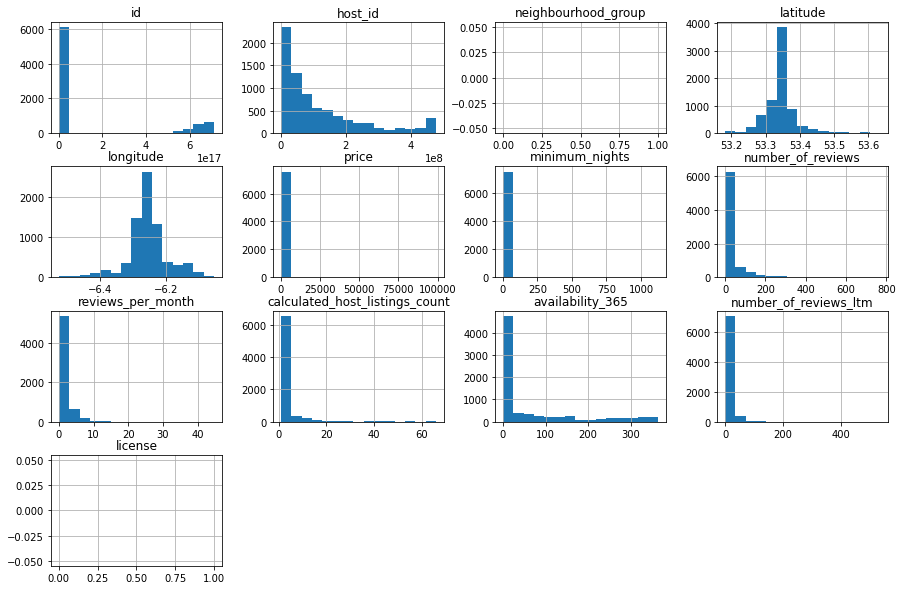

In [7]:
df.hist(bins=15, figsize=(15,10));

**Identificando outliers**

Pela distribuição dos histogramas, é possível verificar indícios da presença de outliers. Por exemplo, nas variáveis `price` e `minimum_nights`.

Os valores não seguem uma distribuição e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam na detecção de outliers. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [8]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count',]].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count
count,7566.000000,7566.000000,7566.000000,6209.000000,7566.000000
mean,182.327914,6.253899,32.141554,1.319006,4.160983
std,1170.750217,28.165241,65.581141,1.988691,9.654986
min,10.000000,1.000000,0.000000,0.010000,1.000000
25%,65.000000,1.000000,1.000000,0.130000,1.000000
50%,105.000000,2.000000,7.000000,0.610000,1.000000
75%,192.750000,4.000000,30.000000,1.760000,3.000000
max,99149.000000,1125.000000,770.000000,44.720000,66.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 192, porém seu valor máximo é 99149.000000.
* A quantidade máxima de noites (`minimum_nights`) está muito acima dos 365 dias de um ano.

**Boxplot para minimum_nights**

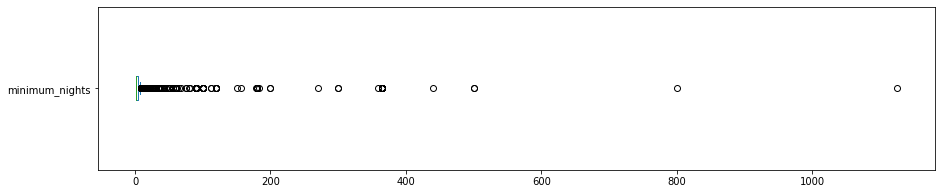

In [9]:
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

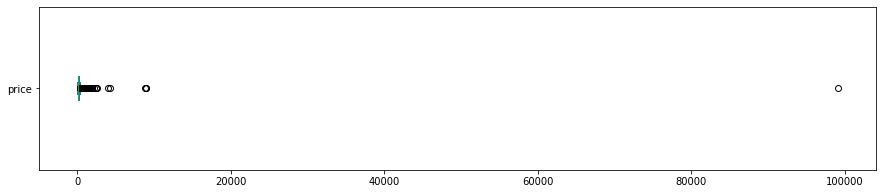

In [10]:
df.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

**Removendo outliers**

Para tratar dos outliers desse conjunto de dados, iremos analisar a distribuição estatística, plotar boxplots e calcular os limites utilizando a regra do IQR Score.

Primeiramente, vamos lembrar o que é o IQR.

O IQR é calculado subtraindo o Terceiro Quartil (75%) pelo Primeiro Quartil (25%).

**IQR = Q3 - Q1**

Vamos dar uma olhada nos nossos dados.



Antes de tudo, iremos excluir as colunas e entradas cujos valores são nulos:

In [11]:
#excluir as coluna 'neighbourhood_group' 'license'
df.drop(columns=['neighbourhood_group', 'license'], inplace=True)

#excluindo entradas com dados faltantes
df.dropna(axis=0, inplace=True)

In [12]:
#dataset sem valores faltantes
(df.isnull().sum()).sort_values(ascending=False)

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

Agora, vamos aos outliers.

In [13]:
#analisando as variáveis que serão tratadas
df[['price', 'minimum_nights']].describe()

,price,minimum_nights
count,6209.000000,6209.000000
mean,178.043807,5.783540
std,1285.661209,26.763868
min,10.000000,1.000000
25%,65.000000,1.000000
50%,104.000000,2.000000
75%,182.000000,3.000000
max,99149.000000,1125.000000


In [14]:
#identificando os outliers para a variável price
q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)
IQR_price = q3_price - q1_price
print('IQR da variável price: ', IQR_price)

#definindo os limites 
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print('Limite superior de price: ', sup_price)
print('Limite inferior de price: ', inf_price)

IQR da variável price:  117.0
Limite superior de price:  357.5
Limite inferior de price:  -110.5


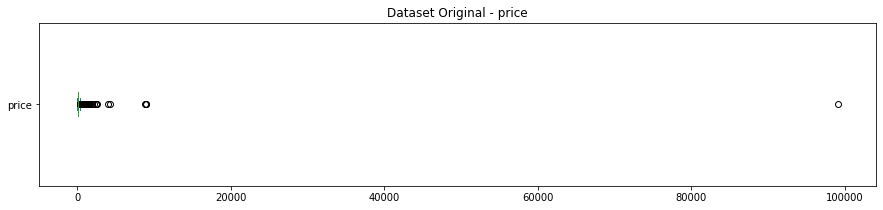

O Dataset possui 6209 entradas
438 entradas acima de 357.5
Representam 7.05% do dataset


In [15]:
#verificando o conjunto original
fig, ax = plt.subplots(figsize=(15,3))
df.price.plot(kind='box', vert=False);
ax.set_title('Dataset Original - price')
plt.show()
print('O Dataset possui {} entradas'.format(df.shape[0]))
print('{} entradas acima de 357.5'.format(len(df[df.price > 357.5])))
print("Representam {:.2f}% do dataset".format((len(df[df.price > 357.5]) / df.shape[0])*100))

Na variável `price` foram encontrados 438 outliers, os quais representam 7.05% do dataset

In [16]:
#identificando os outliers para a variável minimum_nights
q1_minimum_nights = df.minimum_nights.quantile(.25)
q3_minimum_nights = df.minimum_nights.quantile(.75)
IQR_minimum_nights = q3_minimum_nights - q1_minimum_nights
print('IQR da variável minimum_nights: ', IQR_minimum_nights)

#definindo os limites
sup_minimum_nights = q3_minimum_nights + 1.5 * IQR_minimum_nights
inf_minimum_nights = q1_minimum_nights - 1.5 * IQR_minimum_nights

print('Limite superior de minimum_nights: ', sup_minimum_nights)
print('Limite inferior de minimum_nights: ', inf_minimum_nights)

IQR da variável minimum_nights:  2.0
Limite superior de minimum_nights:  6.0
Limite inferior de minimum_nights:  -2.0


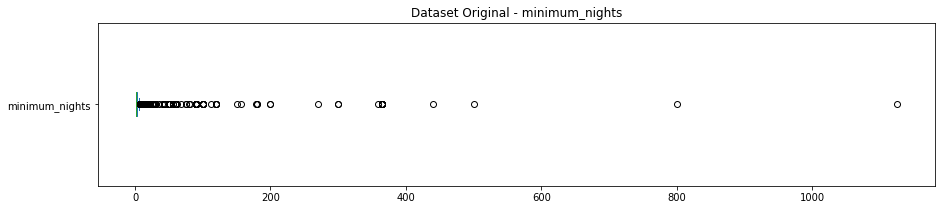

O dataset possui 6209 entradas
870 Entradas acima de 6
Representam 14.01% do dataset


In [17]:
#verificando o conjunto original
fig, ax = plt.subplots(figsize=(15,3))
df.minimum_nights.plot(kind='box', vert=False);
ax.set_title('Dataset Original - minimum_nights')
plt.show()
print('O dataset possui {} entradas'.format(df.shape[0]))
print('{} Entradas acima de 6'.format(len(df[df.minimum_nights > 6])))
print('Representam {:.2f}% do dataset'.format((len(df[df.minimum_nights > 6]) / df.shape[0])*100))

Na variável `minimum_nights` foram encontrados 870 outliers, os quais representam 14% do dataset.

**Concluindo a limpeza dos outliers**

In [18]:
#limpando o dataset
df_clean = df.copy()

df_clean.drop(df_clean[df_clean.price > 357.5].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price == 0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 6].index, axis=0, inplace=True)

print('Shape antes da limpeza: ', df.shape)
print('Shape depois da limpeza: ', df_clean.shape)

Shape antes da limpeza:  (6209, 16)
Shape depois da limpeza:  (4956, 16)


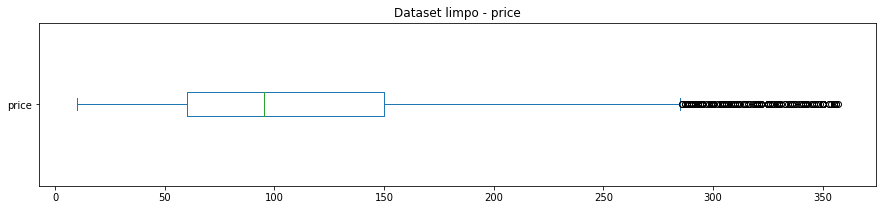

In [19]:
#verificando os conjuntos limpos
#price
fig, ax = plt.subplots(figsize=(15,3))
df_clean.price.plot(kind='box', vert=False);
ax.set_title('Dataset limpo - price')
plt.show()

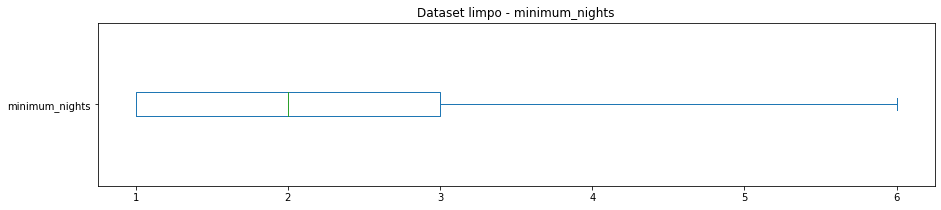

In [20]:
#dataset limpo de minimum_nights
fig, ax = plt.subplots(figsize=(15,3))
df_clean.minimum_nights.plot(kind='box', vert=False);
ax.set_title('Dataset limpo - minimum_nights')
plt.show()

**Histogramas sem outliers e variáveis vazias**

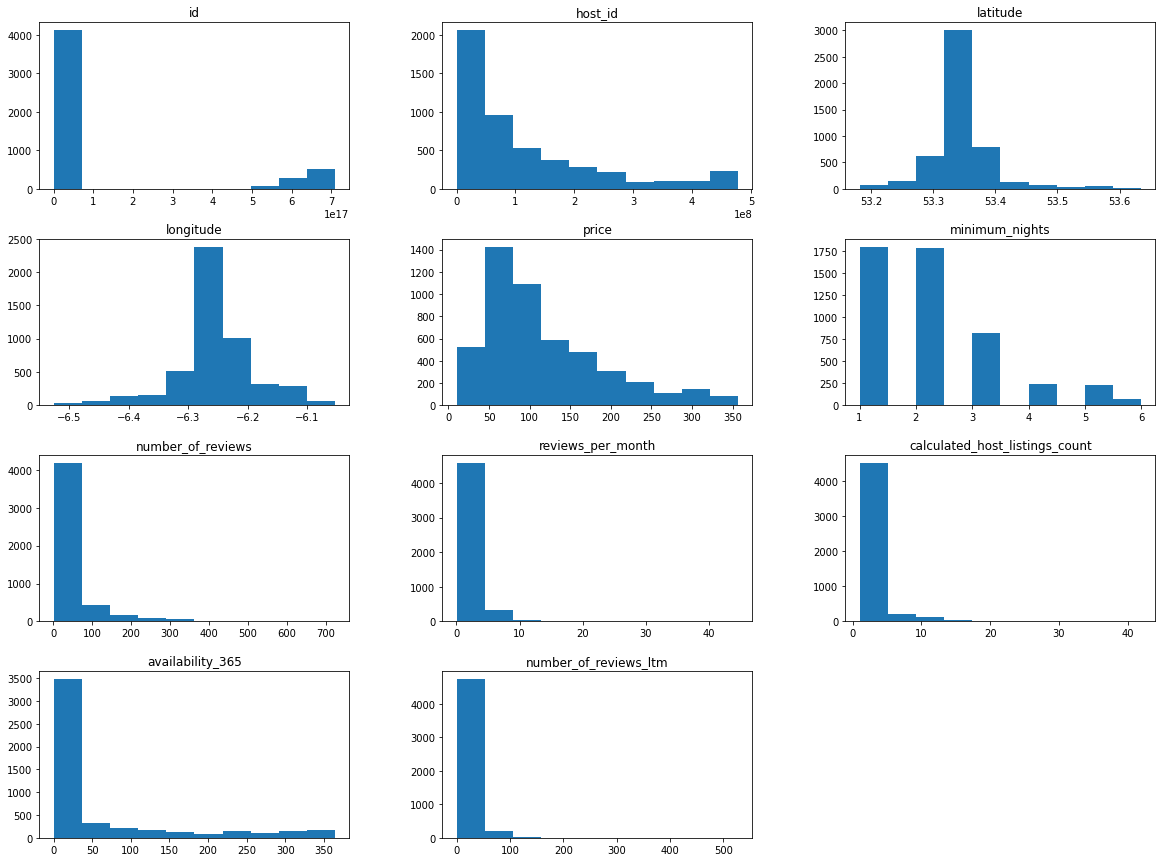

In [31]:
#verificando as distribuições novamente
df_clean.hist(figsize=(20,15),grid=False);

In [22]:
# verificando a distribuição estatística dos dados limpos
df_clean.describe().round(1)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,4.956000e+03,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0,4956.0
mean,1.091481e+17,114757273.0,53.3,-6.3,116.0,2.1,40.0,1.4,2.5,54.7,9.6
std,2.419243e+17,123630380.8,0.1,0.1,74.1,1.2,72.4,2.1,3.9,99.0,21.6
min,4.407700e+04,43984.0,53.2,-6.5,10.0,1.0,1.0,0.0,1.0,0.0,0.0
25%,1.677861e+07,24261701.0,53.3,-6.3,60.0,1.0,3.0,0.1,1.0,0.0,0.0
50%,2.651411e+07,66948631.0,53.3,-6.3,95.0,2.0,11.0,0.6,1.0,0.0,0.0
75%,4.510179e+07,168279822.8,53.4,-6.2,150.0,3.0,40.0,2.0,2.0,62.0,10.0
max,7.100541e+17,478411072.0,53.6,-6.1,357.0,6.0,725.0,44.7,42.0,365.0,528.0


In [23]:
#correlação entre as variáveis
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                 'calculated_host_listings_count', 'availability_365']].corr()
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.204460,-0.000363,0.132512,0.055506,0.226838
minimum_nights,0.204460,1.000000,-0.094257,-0.171836,-0.005720,-0.087549
number_of_reviews,-0.000363,-0.094257,1.000000,0.452848,0.039554,0.149847
reviews_per_month,0.132512,-0.171836,0.452848,1.000000,0.081212,0.318097
calculated_host_listings_count,0.055506,-0.005720,0.039554,0.081212,1.000000,0.115380
availability_365,0.226838,-0.087549,0.149847,0.318097,0.115380,1.000000


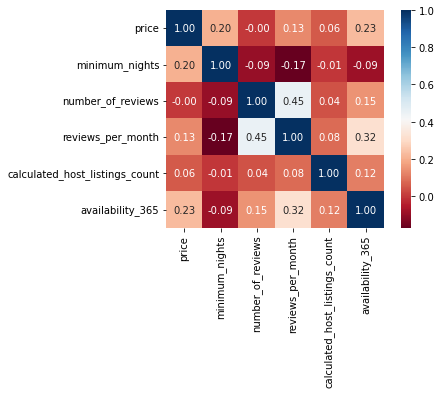

In [24]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

**Verificando o tipo de imóvel mais alugado**

É possível verificar que o tipo de imóvel mais alugado é o *private room* e que o menos alugado é o *hotel room*.

In [25]:
#qual o tipo de móvel mais alugado
df_clean.room_type.value_counts()

Private room       2680
Entire home/apt    2139
Shared room         102
Hotel room           35
Name: room_type, dtype: int64

In [26]:
df_clean.room_type.value_counts() / df_clean.shape[0]

Private room       0.540759
Entire home/apt    0.431598
Shared room        0.020581
Hotel room         0.007062
Name: room_type, dtype: float64

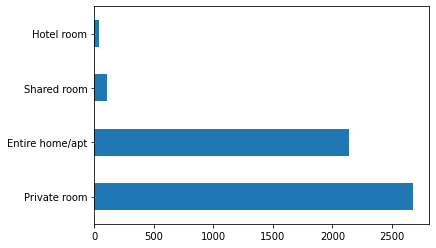

In [27]:
#gráfico dos móveis
df_clean.room_type.value_counts().plot(kind='barh');


**Concluindo a análise e descobrindo a localidade mais cara**

As localidade mais caras são a *Dn Laoghaire-Rathdown* e a *Dublin City*, contudo, é essencial notar que, apesar da quantidade de imóveis localizados na *Dublin City* ser muito maior do que a da outra localidade, seus preços ainda são tão altos e competitivos quanto a outra, revelando que ela tem **mais** valor aos olhos dos viajantes.

In [28]:
#qual a localidade mais cara
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Dn Laoghaire-Rathdown    119.149912
Dublin City              119.109309
Fingal                   103.750442
South Dublin              91.510121
Name: price, dtype: float64

In [29]:
#ver quantidade de imóveis em 'Dn Laoghaire-Rathdown'
print(df_clean[df_clean.neighbourhood == 'Dn Laoghaire-Rathdown'].shape)
print(df_clean[df_clean.neighbourhood == 'Dublin City'].shape)

(567, 16)
(3577, 16)
